## FireProtDB - ddG Target Class (Multiclass classification) - SVM RBF Poly ##

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV, cross_val_score


print('Setup Complete')

Setup Complete


In [8]:
ddG_df = pd.read_csv('Apr10FireProtDB_FeatGen_targetclass.csv')
ddG_df = ddG_df.dropna()
ddG_df = ddG_df.drop(['protein_name',
                      'uniprot_id',
                      'ddG',
                      'secondary_structure',
                      'sequence',
                      'MEC',
                      'Aliphatic Index'], axis=1)

y = ddG_df['target_class']
X = ddG_df.drop(['target_class'], axis=1)

## Radial basis function (rbf) ##

**Test size 20%**

In [8]:
from sklearn.model_selection import train_test_split, GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

**Default parameters**

In [28]:
rbf_default = SVC(kernel= 'rbf', C=1)
rbf_default.fit(X_train, y_train)

y_train_default_pred = rbf_default.predict(X_train)
default_train_accuracy = accuracy_score(y_train, y_train_default_pred)
print(f"Accuracy on train set: {default_train_accuracy:.04f}")

y_pred = rbf_default.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on test set: {accuracy:.04f}")

Accuracy on train set: 0.5993
Accuracy on test set: 0.6432


**Tuning parameters**

In [21]:
%%time
param_grid = {'C': [2, 0.05, 0.1, 0.5, 1, 5, 10, 100]}
svm_model = SVC(kernel = 'rbf')

grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print accuracy for each C
for mean_score, C_value in zip(grid_search.cv_results_['mean_test_score'], param_grid['C']):
    print(f"For C = {C_value}, the cross-validated accuracy is {mean_score:.4f}")

best_C = grid_search.best_params_['C']
print(f"Best C value: {best_C}")

best_SVM = SVC(kernel= 'rbf', C=best_C)
best_SVM.fit(X_train, y_train)

y_train_pred = best_SVM.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

print(f"Accuracy on train set: {train_accuracy:.04f}")

y_pred = best_SVM.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy on test set: {accuracy:.04f}")

For C = 2, the cross-validated accuracy is 0.5993
For C = 0.05, the cross-validated accuracy is 0.5993
For C = 0.1, the cross-validated accuracy is 0.5993
For C = 0.5, the cross-validated accuracy is 0.5993
For C = 1, the cross-validated accuracy is 0.5993
For C = 5, the cross-validated accuracy is 0.5993
For C = 10, the cross-validated accuracy is 0.6020
For C = 100, the cross-validated accuracy is 0.6292
Best C value: 100
Accuracy on train set: 0.6415
Accuracy on test set: 0.6845
CPU times: total: 27.5 s
Wall time: 28 s


**Test size 30%, C=1** (**NOTE: May 22, 2025 changes --> changing it to C=1 because that is default param.)

In [14]:
from sklearn.model_selection import train_test_split, GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [16]:
best_SVM = SVC(kernel= 'rbf', C=1)
best_SVM.fit(X_train, y_train)

#Train accuracy
y_train_pred = best_SVM.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Accuracy on train set: {train_accuracy:.4f}")

#Test accuracy
y_pred = best_SVM.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on test set: {accuracy:.4f}")

Accuracy on train set: 0.6030
Accuracy on test set: 0.6200


## Evaluation - rbf ##

In [31]:
#For 20% test size
from sklearn.metrics import classification_report, confusion_matrix
print("Final classification report:")
print(classification_report(y_test, y_pred))

Final classification report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       216
           1       0.64      1.00      0.78       420
           2       0.00      0.00      0.00        17

    accuracy                           0.64       653
   macro avg       0.21      0.33      0.26       653
weighted avg       0.41      0.64      0.50       653



In [29]:
#For 20% test size BEST PARAMETERS
from sklearn.metrics import classification_report, confusion_matrix
print("Final classification report:")
print(classification_report(y_test, y_pred))

Final classification report:
              precision    recall  f1-score   support

           0       0.77      0.12      0.22       216
           1       0.68      0.99      0.80       420
           2       0.83      0.29      0.43        17

    accuracy                           0.68       653
   macro avg       0.76      0.47      0.48       653
weighted avg       0.71      0.68      0.60       653



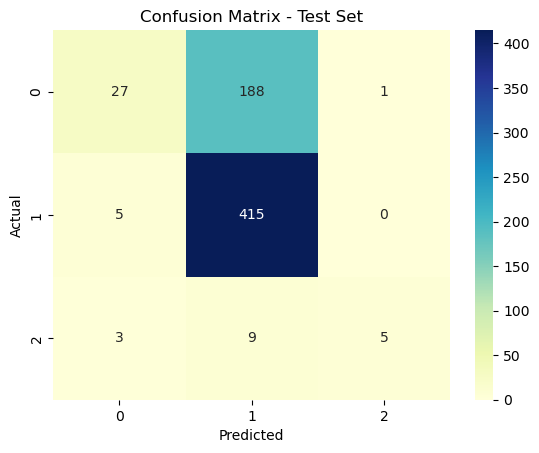

In [31]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='YlGnBu')
plt.title("Confusion Matrix - Test Set")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## Polynomial (poly) ##

**Test size 20%**

In [20]:
from sklearn.model_selection import train_test_split, GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

**Default parameters**

In [23]:
poly_default = SVC(kernel= 'poly', C=1)
poly_default.fit(X_train, y_train)

y_train_default_pred = poly_default.predict(X_train)
default_train_accuracy = accuracy_score(y_train, y_train_default_pred)
print(f"Accuracy on train set: {default_train_accuracy:.04f}")

y_pred = poly_default.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on test set: {accuracy:.04f}")

Accuracy on train set: 0.5993
Accuracy on test set: 0.6432


In [27]:
%%time

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

param_grid = {'C': [2, 0.05, 0.1, 0.5, 1, 5, 10, 100]}

svm_model = SVC(kernel = 'poly')

grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print accuracy for each C
for mean_score, C_value in zip(grid_search.cv_results_['mean_test_score'], param_grid['C']):
    print(f"For C = {C_value}, the cross-validated accuracy is {mean_score:.4f}")

best_C = grid_search.best_params_['C']
print(f"Best C value: {best_C}")

best_SVM = SVC(kernel= 'poly', C=best_C)
best_SVM.fit(X_train, y_train)

y_train_pred = best_SVM.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

print(f"Accuracy on train set: {train_accuracy:.04f}")

y_pred = best_SVM.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy on test set: {accuracy:.04f}")

For C = 2, the cross-validated accuracy is 0.5993
For C = 0.05, the cross-validated accuracy is 0.5993
For C = 0.1, the cross-validated accuracy is 0.5993
For C = 0.5, the cross-validated accuracy is 0.5993
For C = 1, the cross-validated accuracy is 0.5993
For C = 5, the cross-validated accuracy is 0.5993
For C = 10, the cross-validated accuracy is 0.5993
For C = 100, the cross-validated accuracy is 0.5993
Best C value: 2
Accuracy on train set: 0.5993
Accuracy on test set: 0.6432
CPU times: total: 1min 14s
Wall time: 1min 14s


**Test size 30%, C=1** (ALSO CHANGED)

In [16]:
from sklearn.model_selection import train_test_split, GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [18]:
best_SVM = SVC(kernel= 'poly', C=1)
best_SVM.fit(X_train, y_train)

#Train accuracy
y_train_pred = best_SVM.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Accuracy on train set: {train_accuracy:.4f}")

#Test accuracy
y_pred = best_SVM.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on test set: {accuracy:.4f}")

Accuracy on train set: 0.6030
Accuracy on test set: 0.6200


## Evaluation - poly ##

In [25]:
#For 20% test size
from sklearn.metrics import classification_report, confusion_matrix
print("Final classification report:")
print(classification_report(y_test, y_pred))

Final classification report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       216
           1       0.64      1.00      0.78       420
           2       0.00      0.00      0.00        17

    accuracy                           0.64       653
   macro avg       0.21      0.33      0.26       653
weighted avg       0.41      0.64      0.50       653



In [29]:
#For 20% test size BEST PARAMETERS
from sklearn.metrics import classification_report, confusion_matrix
print("Final classification report:")
print(classification_report(y_test, y_pred))

Final classification report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       216
           1       0.64      1.00      0.78       420
           2       0.00      0.00      0.00        17

    accuracy                           0.64       653
   macro avg       0.21      0.33      0.26       653
weighted avg       0.41      0.64      0.50       653



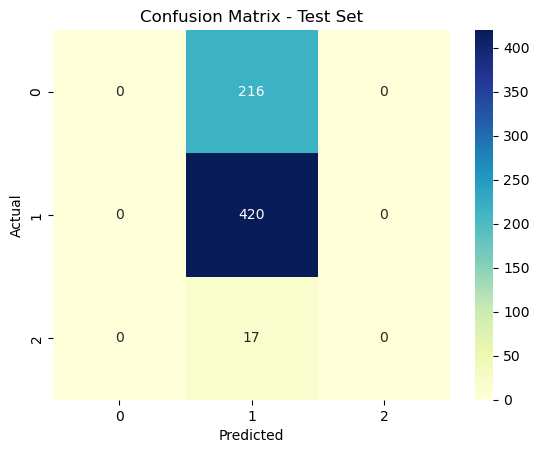

In [47]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='YlGnBu')
plt.title("Confusion Matrix - Test Set")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## 🌱 Random Seed RBF ##

In [7]:
%%time

from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

f1_scores = []

seeds = [7, 19, 23, 41, 53, 67, 89, 97, 113, 149, 173, 211, 251, 283, 313]
#Prime numbers increase distribution randomness

for seed in seeds:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = seed)
    
    randseedRBF = SVC(kernel= 'rbf', C=100)
    randseedRBF.fit(X_train, y_train)
    
    y_pred = randseedRBF.predict(X_test)
    score = f1_score(y_test, y_pred, average='micro')
    f1_scores.append(score)
    print(f"Seed: {seed}, F1 Score: {score:.4f}")

Seed: 7, F1 Score: 0.6386
Seed: 19, F1 Score: 0.6570
Seed: 23, F1 Score: 0.6248
Seed: 41, F1 Score: 0.6524
Seed: 53, F1 Score: 0.6355
Seed: 67, F1 Score: 0.6478
Seed: 89, F1 Score: 0.6355
Seed: 97, F1 Score: 0.6386
Seed: 113, F1 Score: 0.6355
Seed: 149, F1 Score: 0.6585
Seed: 173, F1 Score: 0.6432
Seed: 211, F1 Score: 0.6355
Seed: 251, F1 Score: 0.6585
Seed: 283, F1 Score: 0.6600
Seed: 313, F1 Score: 0.6539
CPU times: total: 6.81 s
Wall time: 6.86 s


In [9]:
import statistics

std_f1 = statistics.stdev(f1_scores)
mean_f1 = statistics.mean(f1_scores)

print(f"Mean F1 Score: {mean_f1:.4f}")
print(f"Standard Deviation: {std_f1:.4f}")

Mean F1 Score: 0.6450
Standard Deviation: 0.0111


In [10]:
%%time

from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

f1_scores = []

seed50 = [7, 11, 16, 23, 31, 49, 56, 60, 71, 79,
         91, 117, 124, 126, 147, 157, 186, 193, 215, 221,
         239, 244, 252, 261, 273, 276, 282, 289, 303, 307,
         313, 322, 338, 346, 355, 367, 368, 382, 398, 401,
         409, 429, 436, 447, 462, 464, 468, 474, 496, 499]

for seed in seed50:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = seed)
    
    randseedRBF = SVC(kernel= 'rbf', C=100)
    randseedRBF.fit(X_train, y_train)
    
    y_pred = randseedRBF.predict(X_test)
    score = f1_score(y_test, y_pred, average='micro')
    f1_scores.append(score)
    print(f"Seed: {seed}, F1 Score: {score:.4f}")

Seed: 7, F1 Score: 0.6386
Seed: 11, F1 Score: 0.6677
Seed: 16, F1 Score: 0.6570
Seed: 23, F1 Score: 0.6248
Seed: 31, F1 Score: 0.6401
Seed: 49, F1 Score: 0.6233
Seed: 56, F1 Score: 0.6554
Seed: 60, F1 Score: 0.6616
Seed: 71, F1 Score: 0.6646
Seed: 79, F1 Score: 0.6631
Seed: 91, F1 Score: 0.6769
Seed: 117, F1 Score: 0.6600
Seed: 124, F1 Score: 0.6386
Seed: 126, F1 Score: 0.6248
Seed: 147, F1 Score: 0.6401
Seed: 157, F1 Score: 0.6309
Seed: 186, F1 Score: 0.6371
Seed: 193, F1 Score: 0.6753
Seed: 215, F1 Score: 0.6799
Seed: 221, F1 Score: 0.6493
Seed: 239, F1 Score: 0.6478
Seed: 244, F1 Score: 0.6447
Seed: 252, F1 Score: 0.6279
Seed: 261, F1 Score: 0.6769
Seed: 273, F1 Score: 0.6386
Seed: 276, F1 Score: 0.6524
Seed: 282, F1 Score: 0.6616
Seed: 289, F1 Score: 0.6554
Seed: 303, F1 Score: 0.6340
Seed: 307, F1 Score: 0.6554
Seed: 313, F1 Score: 0.6539
Seed: 322, F1 Score: 0.6600
Seed: 338, F1 Score: 0.6417
Seed: 346, F1 Score: 0.6616
Seed: 355, F1 Score: 0.6355
Seed: 367, F1 Score: 0.6340
Seed

In [12]:
import statistics

std_f1 = statistics.stdev(f1_scores)
mean_f1 = statistics.mean(f1_scores)

print(f"Mean F1 Score: {mean_f1:.4f}")
print(f"Standard Deviation: {std_f1:.4f}")

Mean F1 Score: 0.6510
Standard Deviation: 0.0168


## 🌱 Random Seed poly ##

In [12]:
%%time

from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

f1_scores = []

seeds = [7, 19, 23, 41, 53, 67, 89, 97, 113, 149, 173, 211, 251, 283, 313]
#Prime numbers increase distribution randomness

for seed in seeds:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = seed)
    
    randseedPOLY = SVC(kernel= 'poly', C=2)
    randseedPOLY.fit(X_train, y_train)
    
    y_pred = randseedPOLY.predict(X_test)
    score = f1_score(y_test, y_pred, average='micro')
    f1_scores.append(score)
    print(f"Seed: {seed}, F1 Score: {score:.4f}")

Seed: 7, F1 Score: 0.5881
Seed: 19, F1 Score: 0.6172
Seed: 23, F1 Score: 0.5881
Seed: 41, F1 Score: 0.6233
Seed: 53, F1 Score: 0.6064
Seed: 67, F1 Score: 0.6126
Seed: 89, F1 Score: 0.5957
Seed: 97, F1 Score: 0.6034
Seed: 113, F1 Score: 0.5957
Seed: 149, F1 Score: 0.6064
Seed: 173, F1 Score: 0.6034
Seed: 211, F1 Score: 0.5896
Seed: 251, F1 Score: 0.6110
Seed: 283, F1 Score: 0.6064
Seed: 313, F1 Score: 0.6095
CPU times: total: 36.8 s
Wall time: 37.4 s


In [14]:
import statistics

std_f1 = statistics.stdev(f1_scores)
mean_f1 = statistics.mean(f1_scores)

print(f"Mean F1 Score: {mean_f1:.4f}")
print(f"Standard Deviation: {std_f1:.4f}")

Mean F1 Score: 0.6038
Standard Deviation: 0.0106


In [14]:
%%time

from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

f1_scores = []

seed50 = [7, 11, 16, 23, 31, 49, 56, 60, 71, 79,
         91, 117, 124, 126, 147, 157, 186, 193, 215, 221,
         239, 244, 252, 261, 273, 276, 282, 289, 303, 307,
         313, 322, 338, 346, 355, 367, 368, 382, 398, 401,
         409, 429, 436, 447, 462, 464, 468, 474, 496, 499]

for seed in seed50:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = seed)
    
    randseedPOLY = SVC(kernel= 'poly', C=2)
    randseedPOLY.fit(X_train, y_train)
    
    y_pred = randseedPOLY.predict(X_test)
    score = f1_score(y_test, y_pred, average='micro')
    f1_scores.append(score)
    print(f"Seed: {seed}, F1 Score: {score:.4f}")

Seed: 7, F1 Score: 0.5881
Seed: 11, F1 Score: 0.6263
Seed: 16, F1 Score: 0.6233
Seed: 23, F1 Score: 0.5881
Seed: 31, F1 Score: 0.6003
Seed: 49, F1 Score: 0.5773
Seed: 56, F1 Score: 0.6110
Seed: 60, F1 Score: 0.6172
Seed: 71, F1 Score: 0.6340
Seed: 79, F1 Score: 0.6217
Seed: 91, F1 Score: 0.6325
Seed: 117, F1 Score: 0.6355
Seed: 124, F1 Score: 0.5972
Seed: 126, F1 Score: 0.6003
Seed: 147, F1 Score: 0.6003
Seed: 157, F1 Score: 0.5988
Seed: 186, F1 Score: 0.5881
Seed: 193, F1 Score: 0.6248
Seed: 215, F1 Score: 0.6294
Seed: 221, F1 Score: 0.6003
Seed: 239, F1 Score: 0.6095
Seed: 244, F1 Score: 0.6049
Seed: 252, F1 Score: 0.5988
Seed: 261, F1 Score: 0.6340
Seed: 273, F1 Score: 0.5942
Seed: 276, F1 Score: 0.6156
Seed: 282, F1 Score: 0.6294
Seed: 289, F1 Score: 0.6080
Seed: 303, F1 Score: 0.5926
Seed: 307, F1 Score: 0.6049
Seed: 313, F1 Score: 0.6095
Seed: 322, F1 Score: 0.6095
Seed: 338, F1 Score: 0.5957
Seed: 346, F1 Score: 0.6340
Seed: 355, F1 Score: 0.5896
Seed: 367, F1 Score: 0.6018
Seed

In [16]:
import statistics

std_f1 = statistics.stdev(f1_scores)
mean_f1 = statistics.mean(f1_scores)

print(f"Mean F1 Score: {mean_f1:.4f}")
print(f"Standard Deviation: {std_f1:.4f}")

Mean F1 Score: 0.6095
Standard Deviation: 0.0152
